# Data Analytics Project#
## Team 9 <br>
## Akshay Bhala<br>
## Juilee Salunkhe<br>
## Raj Desai

>### Introduction:
Subject area is Hospitality and Revenue Management demand forecasting.
<br>
About Data: <br>
Data is about two hotels.One of the hotels is a resort hotel and the other is a city hotel. The structure of the dataset is with 32 variables describing the 119390 observations. Each observation represents a hotel or resort booking. Both datasets comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. 
Project aims to do the following:
1. Descriptive analytics to further understand patterns, trends, and anomalies in data.
2. To understand and analyse bookings cancellations, customer segmentation, customer satiation, seasonality, etc.
3. One of our project goals is aiming at the development of prediction models to classify a hotel booking׳s likelihood to be canceled.
4. Evaluate the performance of various models and select best two models for tuning process.


In [0]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV

## Data Cleaning

In [0]:
df = pd.read_csv('hotel_bookings.csv')

>### **Finding Data Quality Issues:**
1. **Checking for Null, NA, NaN values**.<br>
In some categorical variables like Agent or Company, “NULL” is presented as one of the categories. This should not be considered a missing value, but rather as “not applicable”. For example, if a booking “Agent” is defined as “NULL” it means that the booking did not came from a travel agent.!


In [0]:
print("# of NULL in each columns:", df.isnull().sum(), sep='\n')

# of NULL in each columns:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                         

In [0]:
#function to compute percentage of missing values in columns
def missing_values(x, y):
    percentage = y.isnull().sum() / len(x) * 100
    return percentage
print('Missing value ratios:\nCompany: {}\nAgent: {}\nCountry: {}\nchildren: {}'.format(missing_values(df, df['company']),
                                                                                   missing_values(df, df['agent']),
                                                                                   missing_values(df, df['country']),
                                                                                   missing_values(df, df['children'])))

Missing value ratios:
Company: 94.30689337465449
Agent: 13.686238378423655
Country: 0.40874445095904177
children: 0.003350364352123293


**1. Children:**<br> For children variable, there are only 4 NULL entries and having NULL entries can be same as having no child or 0 children altogether. 
Therefore, substituting 0 in place of NULL entries.

In [0]:
df['children'].fillna(0,inplace=True,limit=4)

**2.** **For Agent variable**: <br>
Since for direct bookings there are no agents required,NULL values can be values corresponding to Direct bookings. Since 13.68% of the data in agent column is NULL , values can't be deleted or not taken into consideration as it can be important for prediction. Therefore, we will substitute an ID ['000'] (for the prediction convenience, so that even this data can be used for it).

In [0]:
p = len(df[(df.market_segment == 'Direct') & (df.agent.isnull())])
q = len(df[(df.market_segment == 'Corporate') & (df.agent.isnull())])
r = len(df[(df.market_segment == 'Offline TA/TO') & (df.agent.isnull())])
s = len(df[(df.market_segment == 'Online TA') & (df.agent.isnull())])
t = len(df[(df.market_segment == 'Aviation') & (df.agent.isnull())])
u = len(df[(df.market_segment == 'Complementary') & (df.agent.isnull())])
v = len(df[(df.market_segment == 'Groups') & (df.agent.isnull())])
w = len(df[(df.market_segment == 'Undefined') & (df.agent.isnull())])
print('Missing value ratios:\nDirect: {}\nCorporate: {}\nOffline TA/TO: {}\nOnline TA: {}\nAviation: {}\nComplementary: {}\nGroups: {}\nUndefined: {}'.format(p,q,r,s,t,u,v,w))
print('Total missing values in agent:{}'.format(q+r+s+t+u+v+w))

Missing value ratios:
Direct: 6007
Corporate: 4594
Offline TA/TO: 389
Online TA: 348
Aviation: 212
Complementary: 640
Groups: 4148
Undefined: 2
Total missing values in agent:10333


In [0]:
#substituting agent ID as 0 for Direct Bookings.
df.loc[df['market_segment'] == 'Direct', 'agent'] = 0

10333 values are NULL which do not correspond to Direct bookings. Mode can be taken of the IDs and used for substitution since very less percentage of Null values are being substituted.

In [0]:
mode_agent = df['agent'].mode()
df.loc[df['agent'].isnull(), 'agent'] = 9.0
df['agent'].isnull().sum()

0

**4.** **For Company Variable:**  <br>
As observed, 94.3% of company column are missing values. Therefore there are less values for the imputation process. The best option is to drop company column.

In [0]:
 # company is dropped
df = df.drop(['company'], axis = 1)

**3. For Country variable:** <br>
There are 488 NULL values for "Country" variable: It is also common for hotels not to know the correct nationality of the customer until the moment of check-in. So if they have cancelled at the last moment it is possible to have null values for those observations.Let us check if that is so.Check whether booking was cancelled or not?

In [0]:
null_data = df[df['country'].isnull()]
len(null_data[null_data['is_canceled']==1].index.tolist())

67

Only 67 out of 488 null values from country variable have status as cancelled.So apparently there is no relation between cancellations and null entries in the country variable.

In [0]:
df=df.dropna()

confirming no null values present

In [0]:
print("# of NULL in each columns:", df.isnull().sum(), sep='\n')

# of NULL in each columns:
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
r

## EDA

>### **Exploratory Data Analysis:**<br>
**1.** **Customer Segmentation** <br>
**2.** **Customer Satiation** <br>
**3.** **Seasonality** <br>
<br>
Will perform univariate, bi-variate and multivariate analysis.

1.   Descriptive Statistics <br>
Univariate basically tells us how data in each feature is distributed and also tells us about central tendencies like mean, median, and mode.

In [0]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000
mean,0.371373,104.308027,2016.157617,27.166726,15.800567,0.928891,2.502136,1.858404,0.104203,0.007948,0.032010,0.087139,0.131629,0.221174,69.097635,2.330676,102.000808,0.061883,0.571706
std,0.483174,106.903127,0.707479,13.589774,8.780371,0.996211,1.900165,0.578576,0.399166,0.097379,0.176026,0.845855,1.484647,0.652775,103.832987,17.630161,50.487004,0.244168,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


**For numeric variables:** <br>
*    [is_canceled]: We can see that the average cancellations is just 37.04% where it deviates by 48% which means there is lots of variation between cancellations which directly affects productivity of the hotel. <br>
*   [total_of_special_requests] : Also, we can see that 75% of people ask for 1 special request.   

In [0]:
# Looking into adults. 
# Using groupby to group according to hotel types only.
df['adults'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79306.0,1.851146,0.509017,0.0,2.0,2.0,2.0,4.0
Resort Hotel,39596.0,1.872942,0.697112,0.0,2.0,2.0,2.0,55.0


In [0]:
# Looking into children. 
# Using groupby to group according to hotel types only.
df['children'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79306.0,0.091393,0.372221,0.0,0.0,0.0,0.0,3.0
Resort Hotel,39596.0,0.129862,0.447192,0.0,0.0,0.0,0.0,10.0


It seems that mean values for adults and children are higher. This means that resort hotels are better choice for large families.

In [0]:
df.meal.value_counts()

BB           91867
HB           14434
SC           10638
Undefined     1165
FB             798
Name: meal, dtype: int64

In [0]:
df.market_segment.value_counts()


Online TA        56403
Offline TA/TO    24160
Groups           19806
Direct           12449
Corporate         5111
Complementary      734
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

**For Categorical variables:** <br>
*   Frequency table of Type of meal booked is shown. Almost 78% of the people book for BB meal type i.e Bed and breakfast.
*   47.30% of market segment designation is of Online Travel Agents.
 

In [0]:
#Looking at the distribution of Market Segments
segments=df["market_segment"].value_counts()

# pie plot


fig = px.pie(segments,
             values=segments.values,
             names=segments.index,
             title="Bookings per market segment",
             #template="seaborn", 
             color =segments.index,     
             color_discrete_map={'Aviation':'lightcyan',
                                 'Complementary':'cyan',
                                 'Corporate':'DeepSkyBlue',
                                 'Direct':'darkblue',
                                 'Offline TA/TO':'yellow',
                                 'Online TA':'lightskyblue',
                                 'Undefined':'green'})

fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

About 47.4% of people book through Online Travel Agents whereas 20.3% book through Offline Travel Agents.

#### **1.** **Customer Segmentation and Satiation:**
Answer following questions:
1. Where do the guest come from?
2. Customer distribution? 
3. Hotel type with more time spent by customers.
4. Repeated guest effect on cancellations
5. How long do repeated people stay at the hotel?
6. Bookings and cancellations


In [0]:
#Where do the guest come from?                    
country_data = pd.DataFrame(df.loc[df["is_canceled"] == 0]["country"].value_counts())
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index

# show on map
guest_map = px.choropleth(country_data,
                    locations=country_data.index,
                    color=country_data["Guests in %"], 
                    hover_name=country_data.index, 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of guests")
guest_map.show()

Highest number of bookings are done by the customers coming from Portugal.

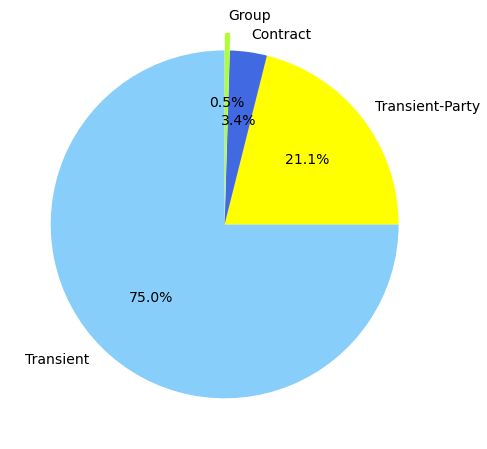

In [0]:
#Uni-variate Analysis
plt.rcParams['figure.figsize'] = 8,8
labels = df['customer_type'].value_counts().index.tolist()

# Convert value counts to list
sizes = df['customer_type'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0,0,0,0.1)

# Determine colour of pie chart
colors = ['lightskyblue','yellow','royalblue','#ADFF2F']
# textprops will adjust the size of text
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

About 75% of people are Transient Type.Only 0.5% bookings are in groups.

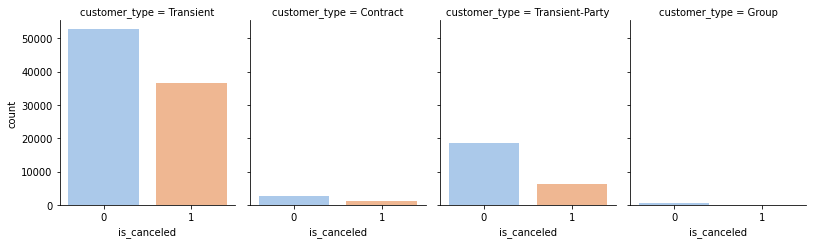

In [0]:
#bi-variate analysis
g = sns.catplot("is_canceled", col="customer_type", col_wrap=4,
                data=df[df.customer_type.notnull()],
                kind="count", height=3.5, aspect=.8, 
                palette='pastel')


plt.show()

Most number of cancellations are done by Transient type

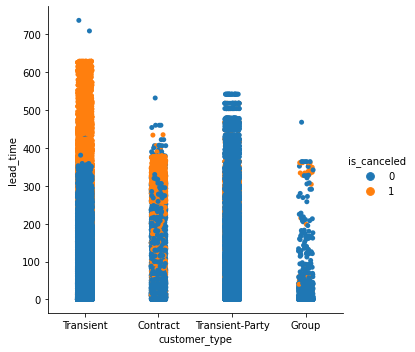

In [0]:
#Multi-variate Analysis
country_data = pd.DataFrame(df.loc[(df["is_canceled"] == 0)|(df["is_canceled"] == 1)]["country"].value_counts())
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index
sns.catplot(x="customer_type", y="lead_time", data=df,hue="is_canceled");

Transient-Party customer category shows very few cancellations even with a decent lead-time. The Transient customer type has the highest number of cancellations. Also it can be seen that more the no of days took as lead time, more cancellations were made.

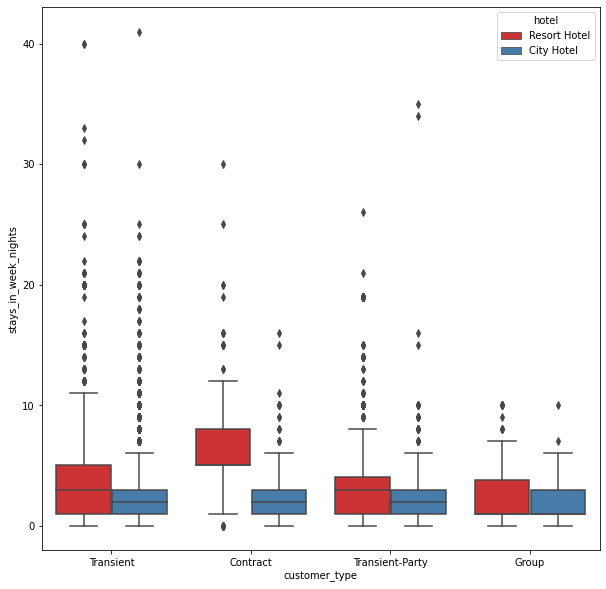

In [0]:
plt.figure(figsize = (10,10))
sns.boxplot(x = "customer_type", y = "stays_in_week_nights", data = df, hue = "hotel", palette = 'Set1');

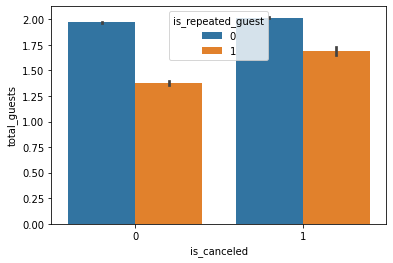

In [0]:
#Creating a dataframe for the visualization sake and introducing "total_guests" feature
new1 = pd.DataFrame()

new1['total_guests'] = df['adults'] + df['children'] + df['babies']
new1 = pd.concat([new1,df['is_canceled']],1)
new1 = pd.concat([new1,df['hotel']],1)
new1 = pd.concat([new1,df['is_repeated_guest']],1)


ax= sns.barplot(x='is_canceled',y='total_guests' ,data=new1,hue='is_repeated_guest');


More number of repeated guests cancel bookings.

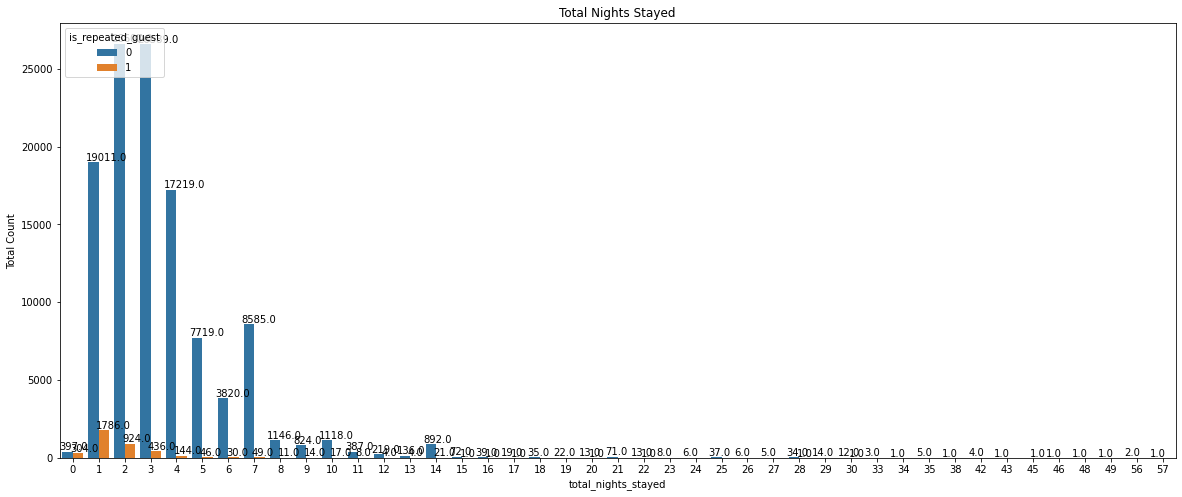

In [0]:
new = df[['reserved_room_type','is_canceled','assigned_room_type']].copy()
new['total_nights_stayed'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
new = pd.concat([new,df['is_repeated_guest']],1)
plt.figure(figsize=(20,8))
ax = sns.countplot(x="total_nights_stayed", data = new, palette="tab10",hue='is_repeated_guest')
plt.title('Total Nights Stayed')
plt.xlabel('total_nights_stayed')
plt.ylabel('Total Count')
for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()-0.1 , p.get_height()+100)) 

Most of the customers on average stayed from about 1-4 days. Of those very few were repeated customers. It seems that repeated guests do not find hotel/ resort promising. Management system should focus on repeated guests as well.

In [0]:
new['Given_same_roomtype'] = 0
#import seaborn as sb
new.loc[(df.reserved_room_type == 'A') & (df.assigned_room_type == 'A'), 'Given_same_roomtype'] = 1
new.loc[(df.reserved_room_type == 'B') & (df.assigned_room_type == 'B'), 'Given_same_roomtype'] = 1
new.loc[(df.reserved_room_type == 'C') & (df.assigned_room_type == 'C'), 'Given_same_roomtype'] = 1
new.loc[(df.reserved_room_type == 'D') & (df.assigned_room_type == 'D'), 'Given_same_roomtype'] = 1
new.loc[(df.reserved_room_type == 'E') & (df.assigned_room_type == 'E'), 'Given_same_roomtype'] = 1
new.loc[(df.reserved_room_type == 'F') & (df.assigned_room_type == 'F'), 'Given_same_roomtype'] = 1
new.loc[(df.reserved_room_type == 'G') & (df.assigned_room_type == 'G'), 'Given_same_roomtype'] = 1
new.loc[(df.reserved_room_type == 'H') & (df.assigned_room_type == 'H'), 'Given_same_roomtype'] = 1
new.loc[(df.reserved_room_type == 'L') & (df.assigned_room_type == 'L'), 'Given_same_roomtype'] = 1
new.loc[(df.reserved_room_type == 'P') & (df.assigned_room_type == 'P'), 'Given_same_roomtype'] = 1
new
new = pd.concat([new,new1['total_guests']],1)
new = pd.concat([new,df['is_repeated_guest']],1)
new = pd.concat([new,df['customer_type']],1)
new = pd.concat([new,df['lead_time']],1)
new = pd.concat([new,df['arrival_date_year']],1)
new['total_nights_stayed'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']


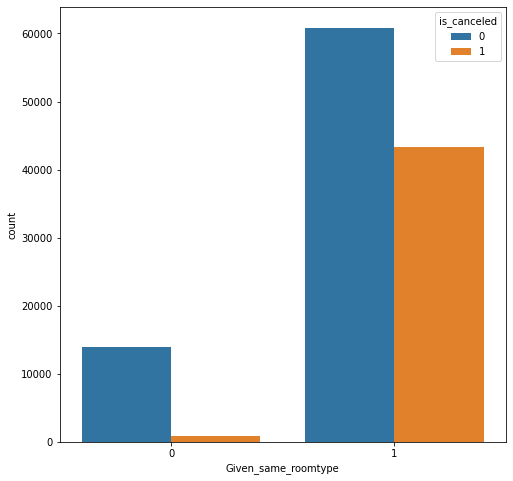

In [0]:
ax= sns.countplot(data = new, x = 'Given_same_roomtype', hue = 'is_canceled')

plt.show()

As we can see, more number of customers those have been assigned the same room type which they reserved did no cancelations.
Also even if they are given the same room type there are still cancellations which are in significant numbers. This can be due to other reasons which are not taken into consideration.

3. Seasonality

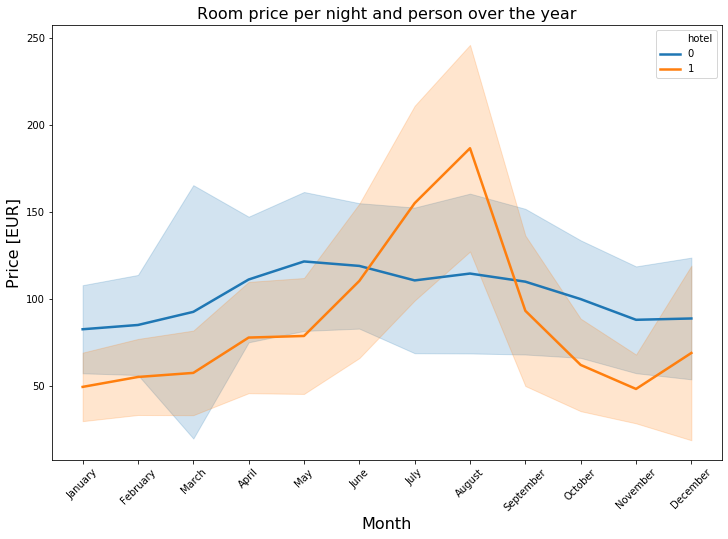

In [0]:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
df["arrival_date_month"] = pd.Categorical(df["arrival_date_month"], categories=ordered_months, ordered=True)

# barplot with standard deviation:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel", data=df, 
             ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()

Outlier Detection

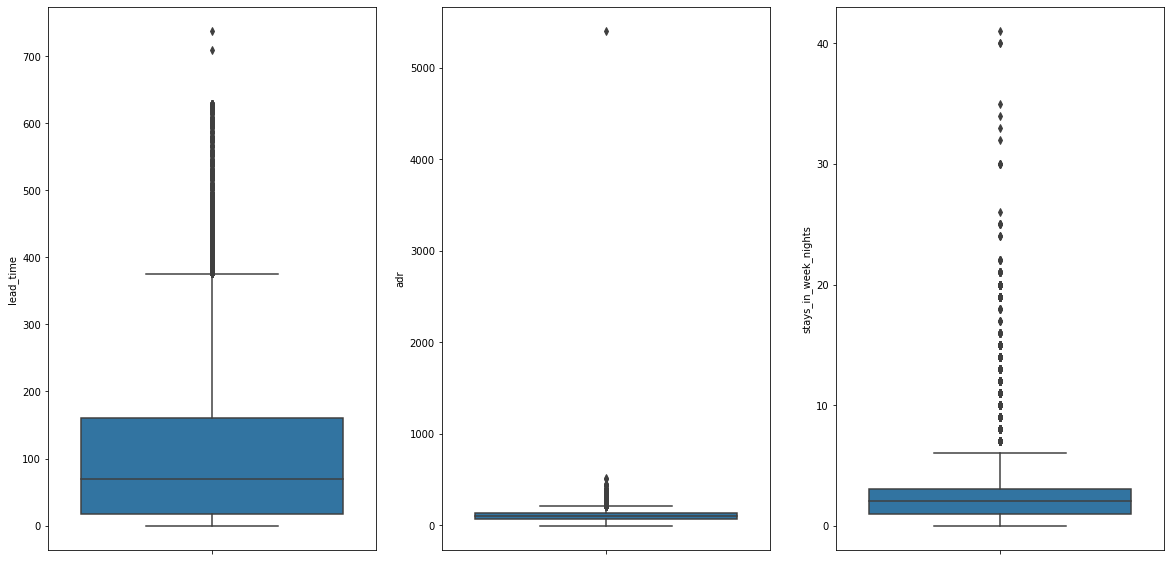

In [0]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.boxplot(y= df['lead_time'])

plt.subplot(1,3,2)
sns.boxplot(y=df['adr'])

plt.subplot(1,3,3)
sns.boxplot(y=df['stays_in_week_nights'])
plt.show()

In [0]:
def outliers_IQR(data, col):
    lower_quartile = data[col].quantile(0.25)
    upper_quartile = data[col].quantile(0.75)
    IQR = upper_quartile - lower_quartile
    outlier_thresh = 1.5 * IQR
    return data[data[col].between((lower_quartile - outlier_thresh), (upper_quartile + outlier_thresh))]
df = outliers_IQR(df, 'lead_time')
df = outliers_IQR(df, 'stays_in_weekend_nights')
df = outliers_IQR(df, 'stays_in_week_nights')
df = outliers_IQR(df, 'days_in_waiting_list')
df = outliers_IQR(df, 'adr')

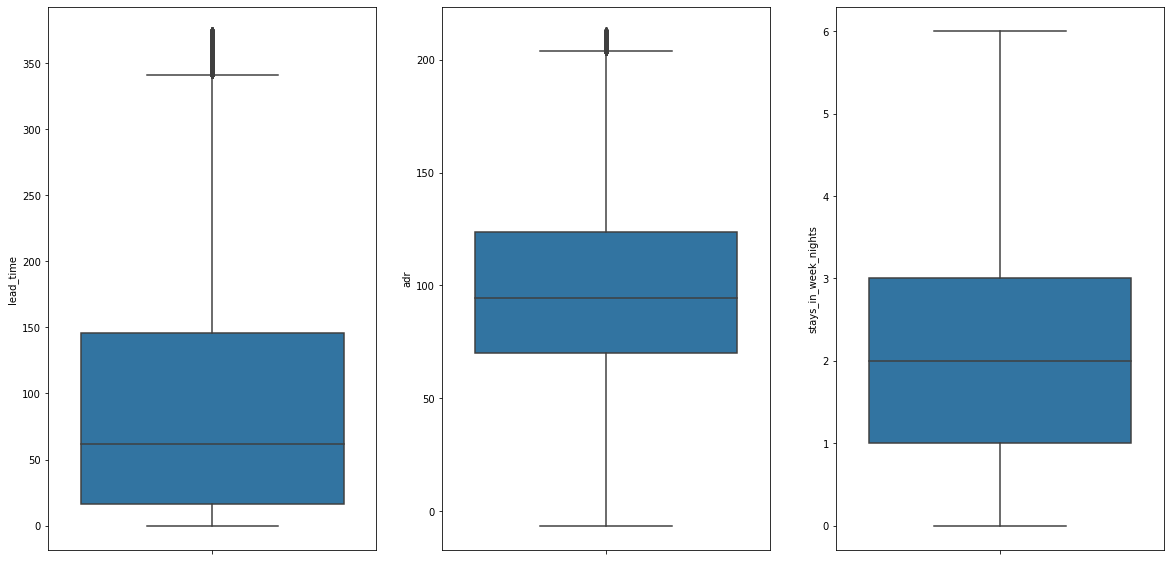

In [0]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.boxplot(y= df['lead_time'])

plt.subplot(1,3,2)
sns.boxplot(y=df['adr'])

plt.subplot(1,3,3)
sns.boxplot(y=df['stays_in_week_nights'])
plt.show()

In [0]:
df['total_guest']=df['adults']+df['babies']+df['children']
df = df.drop(['country','reservation_status_date','adults','babies','children'],axis =1)
df_dummies = pd.get_dummies(df,columns = ['hotel','arrival_date_month','meal','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status'])

## Feature Selection

In [0]:
X = df_dummies.drop(columns=['is_canceled'])
Y = df_dummies['is_canceled'].values
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.539e+27
Date:                Wed, 29 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:30:47   Log-Likelihood:             2.8892e+06
No. Observations:              105592   AIC:                        -5.778e+06
Df Residuals:                  105523   BIC:                        -5.778e+06
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [0]:
X = X.drop(columns=['arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes','required_car_parking_spaces',
       'total_of_special_requests', 'total_guest','reservation_status_Canceled','reservation_status_Check-Out',
       'reservation_status_No-Show'])

## Training and Testing split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3,random_state=0)

## Base Models

In [0]:
accuracies = {}

In [0]:

lr = LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))


Test Accuracy 75.60%


In [0]:
from sklearn.naive_bayes import GaussianNB
nb_G = GaussianNB()
nb_G = nb_G.fit(x_train, y_train)
acc = nb_G.score(x_test,y_test)*100

accuracies['Naive Bayes'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 65.68%


In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()  
knn = knn.fit(x_train, y_train)
acc = knn.score(x_test,y_test)*100

accuracies['KNN'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 74.36%


In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
acc = rf.score(x_test,y_test)*100

accuracies['RF'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 81.38%


In [0]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(x_train, y_train)
acc = gradient_boosting.score(x_test,y_test)*100

accuracies['GB'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 77.24%


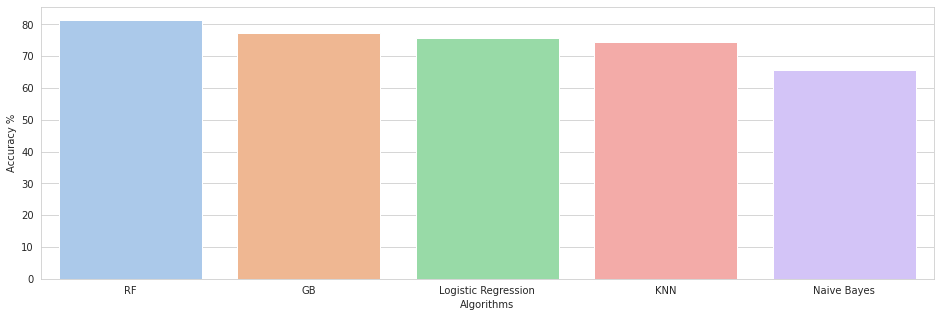

In [0]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='pastel')
plt.show()

## Logistic

In [0]:
lr = LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions = lr.predict(x_test)
print("\n Confusion Matrix \n",confusion_matrix(y_test,predictions))
print("\n Classification Report \n",classification_report(y_test,predictions))


 Confusion Matrix 
 [[19489   909]
 [ 6820  4460]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.74      0.96      0.83     20398
           1       0.83      0.40      0.54     11280

    accuracy                           0.76     31678
   macro avg       0.79      0.68      0.69     31678
weighted avg       0.77      0.76      0.73     31678



In [0]:
param_grid = { 'C':[0.1,0.5,1.0,5.0,10.0],'penalty':['l1','l2'], 'max_iter': [10000]} 
grid = GridSearchCV(LogisticRegression(),param_grid,n_jobs=3)
grid = grid.fit(x_train,y_train)
grid_predictions = grid.predict(x_test)
print("\n Best Parameters \n",grid.best_params_)


 Best Parameters 
 {'C': 0.1, 'max_iter': 10000, 'penalty': 'l2'}


In [0]:
print("\n Classification Report \n",classification_report(y_test,grid_predictions))


 Classification Report 
               precision    recall  f1-score   support

           0       0.74      0.96      0.84     20398
           1       0.84      0.40      0.54     11280

    accuracy                           0.76     31678
   macro avg       0.79      0.68      0.69     31678
weighted avg       0.77      0.76      0.73     31678



In [0]:
lrc = confusion_matrix(y_test,grid_predictions)

In [0]:
lr = LogisticRegression(C=1.0, penalty='l2', max_iter=10000)
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
pkl_filename = "lr.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(lr,file)

In [0]:
lr_1 = LogisticRegression(C=0.1, penalty='l2', max_iter=10000 )
lr_1.fit(x_train,y_train)
pr_lr = lr_1.predict(x_test)
pkl_filename = "lr1.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(lr_1,file)

In [0]:
lr_2 = LogisticRegression(C=5.0, penalty='none', max_iter=10000)
lr_2.fit(x_train,y_train)
predictions = lr_2.predict(x_test)
pkl_filename = "lr2.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(lr_2,file)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters



In [0]:
lr_3 = LogisticRegression(C=5.0, penalty='l1', max_iter=10000,solver = "liblinear")
lr_3.fit(x_train,y_train)
lr1_pre = lr_3.predict(x_test)
pkl_filename = "lr3.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(lr_3,file)

In [0]:
lr_4 = LogisticRegression(C=10.0, penalty='l2', max_iter=10000)
lr_4.fit(x_train,y_train)
lr5_pre = lr_4.predict(x_test)
pkl_filename = "lr4.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(lr_4,file)

## Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model = rf.fit(x_train, y_train)
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
predictions = rf.predict(x_test)
print("\n Confusion Matrix \n",confusion_matrix(y_test,predictions))
print("\n Classification Report \n",classification_report(y_test,predictions))
acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc


 Confusion Matrix 
 [[17987  2411]
 [ 3534  7746]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86     20398
           1       0.76      0.69      0.72     11280

    accuracy                           0.81     31678
   macro avg       0.80      0.78      0.79     31678
weighted avg       0.81      0.81      0.81     31678



In [0]:
param_grid = { 'bootstrap': [True],
    'max_depth': [0,10,100],
    'max_features': [0.1,0.5,1],
    'min_samples_leaf': [1,3,5],
    'min_samples_split': [2, 4 , 8],
    'n_estimators': [100, 200, 300]} 
grid = GridSearchCV(RandomForestClassifier(),param_grid,n_jobs=3)
grid = grid.fit(x_train,y_train)
grid_predictions = grid.predict(x_test)
print("\n Best Parameters \n",grid.best_params_)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.




 Best Parameters 
 {'bootstrap': True, 'max_depth': 100, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}


In [0]:
print("\n Confusion Matrix \n",confusion_matrix(y_test,grid_predictions))
print("\n Classification Report \n",classification_report(y_test,grid_predictions))


 Confusion Matrix 
 [[18252  2146]
 [ 3633  7647]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86     20398
           1       0.78      0.68      0.73     11280

    accuracy                           0.82     31678
   macro avg       0.81      0.79      0.79     31678
weighted avg       0.82      0.82      0.81     31678



In [0]:
rfc = confusion_matrix(y_test,grid_predictions)

In [0]:
rf_1 = RandomForestClassifier(bootstrap=True,max_depth=100,max_features=0.5,min_samples_leaf=1,min_samples_split=4,n_estimators=300)
rf_1.fit(x_train, y_train)
rf_pred = rf_1.predict(x_test)
pkl_filename = "rf.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(rf_1,file)

In [0]:
rf_2 = RandomForestClassifier(bootstrap=True,max_depth=100,max_features=0.5,min_samples_leaf=3,min_samples_split=2,n_estimators=100)
rf_2.fit(x_train, y_train)
predictions = rf_2.predict(x_test)
pkl_filename = "rf1.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(rf_2,file)

In [0]:
rf_3 = RandomForestClassifier(bootstrap=True,max_depth=10,max_features=0.5,min_samples_leaf=1,min_samples_split=2,n_estimators=100)
rf_3.fit(x_train, y_train)
rf3_predict = rf_3.predict(x_test)
import pickle
pkl_filename = "rf2.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(rf_3,file)

In [0]:
rf_4 = RandomForestClassifier(bootstrap=True,max_depth=10,max_features=0.1,min_samples_leaf=1,min_samples_split=2,n_estimators=100)
rf_4.fit(x_train, y_train)
predictions = rf_4.predict(x_test)
import pickle
pkl_filename = "rf3.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(rf_4,file)

In [0]:
rf_5 = RandomForestClassifier(bootstrap=True,max_depth=50,max_features=1,min_samples_leaf=5,min_samples_split=8,n_estimators=200)
rf_5.fit(x_train, y_train)
rf5_predict = rf_5.predict(x_test)
import pickle
pkl_filename = "rf4.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(rf_5,file)

## GBM


In [0]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting = GradientBoostingClassifier(random_state=42)
modelg=gradient_boosting.fit(x_train, y_train)
modelg

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
predictions = gradient_boosting.predict(x_test)
print("\n Confusion Matrix \n",confusion_matrix(y_test,predictions))
print("\n Classification Report \n",classification_report(y_test,predictions))


 Confusion Matrix 
 [[19358  1040]
 [ 6171  5109]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.76      0.95      0.84     20398
           1       0.83      0.45      0.59     11280

    accuracy                           0.77     31678
   macro avg       0.79      0.70      0.71     31678
weighted avg       0.78      0.77      0.75     31678



In [0]:
param_grid = {'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1,0.5,1.0]} 
grid = GridSearchCV(GradientBoostingClassifier(),param_grid,n_jobs=3)
grid = grid.fit(x_train,y_train)
grid_predictions = grid.predict(x_test)
print("\n Best Parameters \n",grid.best_params_)


 Best Parameters 
 {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300}


In [0]:
print("\n Confusion Matrix \n",confusion_matrix(y_test,grid_predictions))
print("\n Classification Report \n",classification_report(y_test,grid_predictions))


 Confusion Matrix 
 [[18531  1867]
 [ 4080  7200]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86     20398
           1       0.79      0.64      0.71     11280

    accuracy                           0.81     31678
   macro avg       0.81      0.77      0.78     31678
weighted avg       0.81      0.81      0.81     31678



In [0]:
gbc = confusion_matrix(y_test,grid_predictions)

In [0]:
gb = GradientBoostingClassifier(n_estimators=300,max_depth=9,learning_rate=0.1)
gb = gb.fit(x_train, y_train)
gb_predict = gb.predict(x_test)
pkl_filename = "gB.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(gb,file)

In [0]:
gb_1 = GradientBoostingClassifier(n_estimators=100,max_depth=6,learning_rate=0.1)
gb_1 = gb_1.fit(x_train, y_train)
pred_gb1 = gb_1.predict(x_test)
pkl_filename = "gB1.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(gb_1,file)

In [0]:
gb_2 = GradientBoostingClassifier(n_estimators=200,max_depth=3,learning_rate=0.5)
gb_2 = gb_2.fit(x_train, y_train)
gb2_pred = gb_2.predict(x_test)
pkl_filename = "gB2.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(gb_2,file)

In [0]:
gb_3 = GradientBoostingClassifier(n_estimators=300,max_depth=6,learning_rate=1.0)
gb_3 = gb_3.fit(x_train, y_train)
predictions = gb_3.predict(x_test)
pkl_filename = "gB3.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(gb_3,file)

In [0]:
gb_4 = GradientBoostingClassifier(n_estimators=100,max_depth=9,learning_rate=1.0)
gb_4 = gb_4.fit(x_train, y_train)
predictions = gb_4.predict(x_test)
pkl_filename = "gB4.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(gb_4,file)

## Confusion Matrix

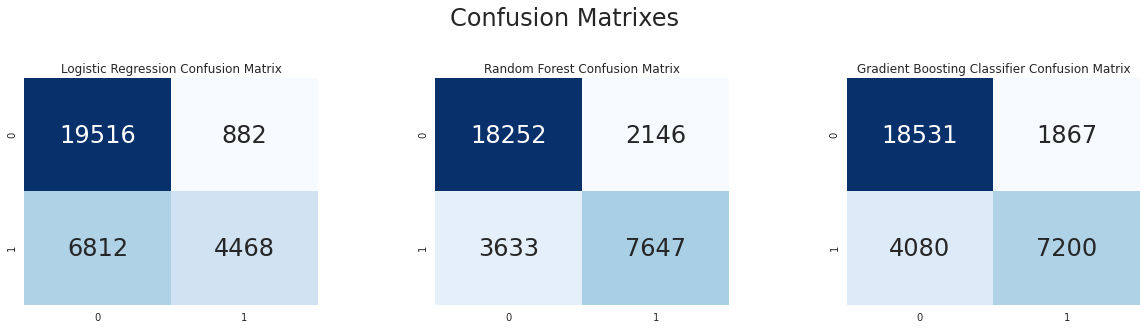

In [0]:
plt.figure(figsize=(20,10))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(lrc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(rfc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Gradient Boosting Classifier Confusion Matrix")
sns.heatmap(gbc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.show()

## Feature Importance

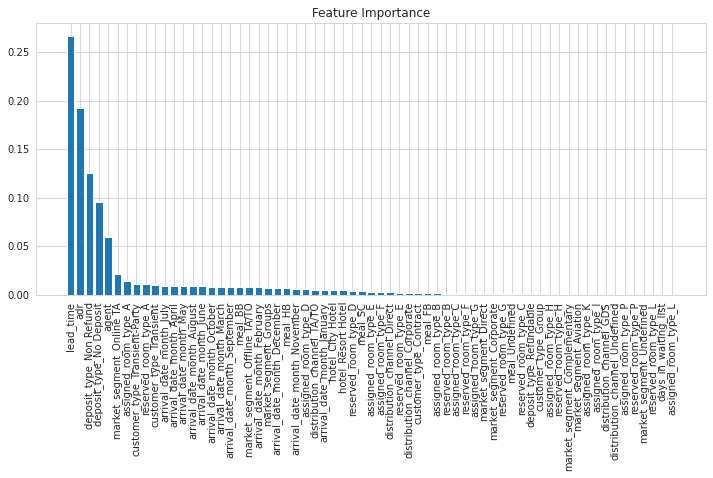

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(bootstrap=True,max_depth=100,max_features=0.5,min_samples_leaf=1,min_samples_split=4,n_estimators=300)
model = rf.fit(x_train, y_train)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = list(X.columns) 
# Rearrange feature names so they match the sorted feature importances
names = [feature_names[i] for i in indices]

# Create plot
plt.figure(figsize=(12,5))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()